In [14]:
import pandas as pd
import os
import statsmodels.api as sm
# Load the Excel file
file_path = '/data_store/RQ4.xlsx'
file_path = os.path.join('..', 'data_store', 'RQ4.xlsx')
# Read the 'Clean Data' sheet
try:
    clean_data_df = pd.read_excel(file_path, sheet_name='Clean Data')
    loaded = True
    clean_data_df.head()
except Exception as e:
    loaded = False
    error_message = str(e)

loaded, clean_data_df if loaded else error_message

(True,
                Name  Gender                       Race    Painting  Rating  \
 0   Richard Hoffman    Male                      White  Painting 1    82.0   
 1   Richard Hoffman    Male                      White  Painting 1    80.0   
 2   Richard Hoffman    Male                      White  Painting 1    85.0   
 3   Richard Hoffman    Male                      White  Painting 1    85.0   
 4   Richard Hoffman    Male                      White  Painting 1    85.0   
 ..              ...     ...                        ...         ...     ...   
 92  Lakisha Jackson  Female  Black or African American  Painting 2    82.0   
 93  Lakisha Jackson  Female  Black or African American  Painting 2    85.0   
 94  Lakisha Jackson  Female  Black or African American  Painting 2    82.0   
 95  Lakisha Jackson  Female  Black or African American  Painting 2    85.0   
 96  Lakisha Jackson  Female  Black or African American  Painting 2    85.0   
 
                                           

In [15]:
# Calculating the average, max, and min ratings for each name
rating_stats = clean_data_df.groupby('Name')['Rating'].agg(['mean', 'max', 'min']).rename(columns={
    'mean': 'Average Rating',
    'max': 'Max Rating',
    'min': 'Min Rating'
}).reset_index()

modified_data = clean_data_df.drop(columns=['Response'])
modified_data = modified_data.drop(columns=['Rating'])
# Merging the calculated statistics back with the original data
merged_data = modified_data.merge(rating_stats, on='Name')
merged_data =  merged_data.drop_duplicates()
merged_data.reset_index(inplace=True)

In [17]:
print(merged_data)

   index               Name  Gender                         Race    Painting  \
0      0    Richard Hoffman    Male                        White  Painting 1   
1     10             Amy Li  Female  Asian or Pacific Highlander  Painting 1   
2     20   Jermaine Jackson    Male    Black or African American  Painting 1   
3     30        Julio Perez  Female                     Hispanic  Painting 1   
4     40          Alan Wang    Male  Asian or Pacific Highlander  Painting 2   
5     50         Mary Meyer  Female                        White  Painting 2   
6     60  Alejandro Ramirez    Male                     Hispanic  Painting 2   
7     70    Lakisha Jackson  Female    Black or African American  Painting 2   

   Average Rating  Max Rating  Min Rating  
0            83.1        85.0        80.0  
1            83.8        85.0        82.0  
2            81.9        85.0        75.0  
3            84.1        85.0        82.0  
4            84.7        85.0        82.0  
5            83

In [18]:
race_stats = clean_data_df.groupby('Race')['Rating'].agg(['mean', 'min', 'max'])
race_stats.reset_index(inplace=True)

In [19]:
data = pd.read_excel(file_path, sheet_name='Clean Data')
cleaned_data = data.dropna()

# One-hot encode the 'Race' variable in the cleaned data
cleaned_data_encoded = pd.get_dummies(cleaned_data, columns=['Race'])

# Prepare the independent variables (X) and the dependent variable (y) from the cleaned data
X_cleaned = cleaned_data_encoded.iloc[:, cleaned_data_encoded.columns.str.startswith('Race_')]
y_cleaned = cleaned_data_encoded['Rating']

# Add a constant to the model (as it's OLS)
X_cleaned = sm.add_constant(X_cleaned)

# Perform the OLS regression on the cleaned data
model_cleaned = sm.OLS(y_cleaned, X_cleaned).fit()

# Get the summary of the regression
regression_summary_cleaned = model_cleaned.summary()
print(regression_summary_cleaned)

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     2.337
Date:                Sat, 25 Nov 2023   Prob (F-statistic):             0.0803
Time:                        20:15:53   Log-Likelihood:                -171.75
No. Observations:                  80   AIC:                             351.5
Df Residuals:                      76   BIC:                             361.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

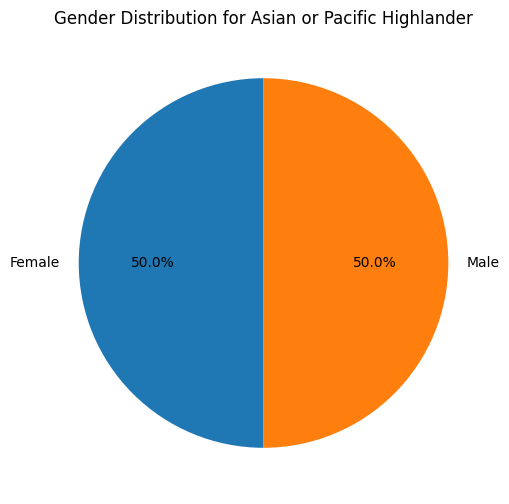

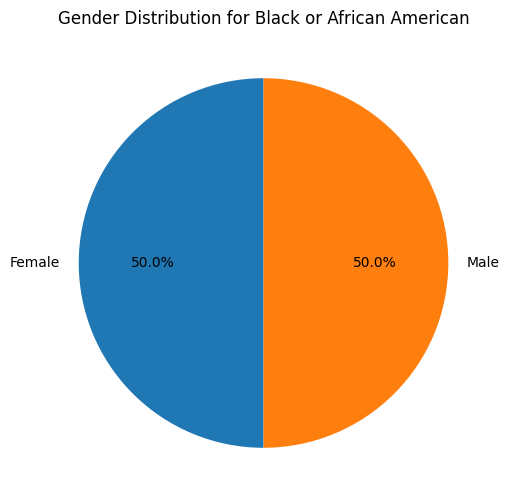

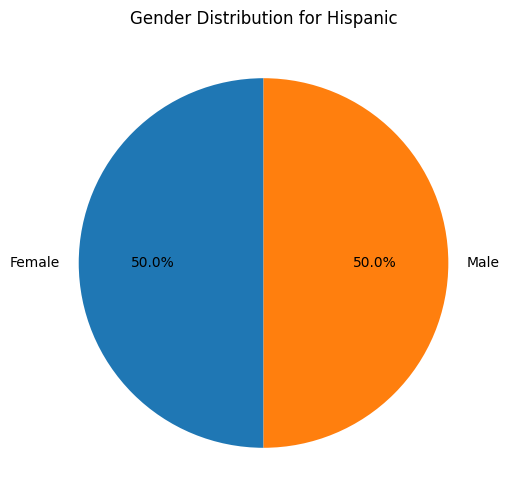

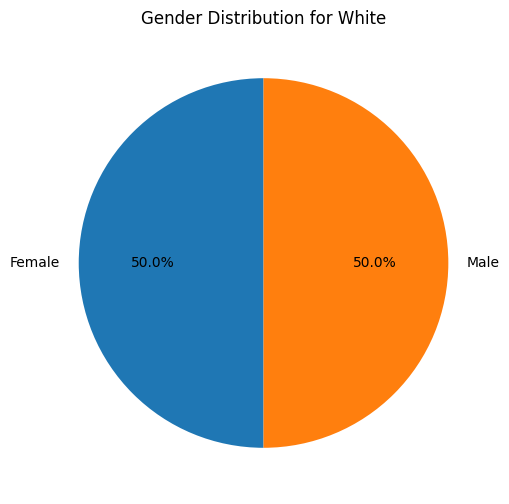

In [20]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Load the Excel file
file_path = os.path.join('..', 'data_store', 'RQ4.xlsx')

# Read the 'Clean Data' sheet
clean_data_df = pd.read_excel(file_path, sheet_name='Clean Data')

# Drop rows with missing values
clean_data_df = clean_data_df.dropna()

# Calculate the percentage of men and women for each category
gender_percentage = clean_data_df.groupby(['Race', 'Gender']).size().unstack(fill_value=0)

# Calculate the total count for each category
gender_percentage['Total'] = gender_percentage['Female'] + gender_percentage['Male']

# Calculate the percentage
gender_percentage['Female (%)'] = (gender_percentage['Female'] / gender_percentage['Total']) * 100
gender_percentage['Male (%)'] = (gender_percentage['Male'] / gender_percentage['Total']) * 100

# Plot pie charts for each category
for race in gender_percentage.index:
    labels = ['Female', 'Male']
    sizes = [gender_percentage.loc[race, 'Female (%)'], gender_percentage.loc[race, 'Male (%)']]
    
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'Gender Distribution for {race}')
    plt.show()